In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# Hide warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")
# Reading CSV file into training set
raw_data = pd.read_csv('battery operation.csv').drop(0).convert_objects(convert_numeric=True)
raw_data["Data Type:"]=pd.to_datetime(raw_data["Data Type:"])
lenraw=len(raw_data)
#raw_all=raw_data.iloc[:,1:4].values
raw_price=raw_data.iloc[:,1:2].values
raw_charge=raw_data.iloc[:,2:3].values
raw_discharge=raw_data.iloc[:,3:4].values
time=raw_data.iloc[:,0]
raw_data.head()

,Data Type:,PoolPrices,Charge,Discharge
1,2030-07-11 01:00:00,136.891388,0.000000,0.0
2,2030-07-11 01:30:00,127.015976,0.000000,0.0
3,2030-07-11 02:00:00,119.542160,0.000000,0.0
4,2030-07-11 02:30:00,106.354080,0.000000,0.0
5,2030-07-11 03:00:00,99.693600,2.125072,0.0


In [2]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
pc = MinMaxScaler()
raw_price = pc.fit_transform(raw_price)
cc = MinMaxScaler()
raw_charge = cc.fit_transform(raw_charge)
dc = MinMaxScaler()
raw_discharge = dc.fit_transform(raw_discharge)

In [3]:
p=70

In [4]:
title=[]
for i in range(p):
    title.append('PoolPrices'+str(p-i)+'timestep ago')
    title.append('Charge'+str(p-i)+'timestep ago')
    title.append('Discharge'+str(p-i)+'timestep ago')
    title.append('react'+str(p-i)+'timestep ago')
title.append('current PoolPrices')
title.append('current Charge')
title.append('current Discharge')
title.append('current react')
data_set=pd.DataFrame(columns=title) 

In [5]:
raw_price=np.reshape(raw_price,lenraw)
raw_charge=np.reshape(raw_charge,lenraw)
raw_discharge=np.reshape(raw_discharge,lenraw)

In [6]:
1*(raw_charge>0)

array([0, 0, 0, ..., 1, 1, 0])

In [7]:
for i in range(p+1):
    data_set.iloc[:,i*4]=raw_price[i:lenraw-(p+1)+i].tolist()
    data_set.iloc[:,i*4+1]=raw_charge[i+1:lenraw-(p+1)+i+1].tolist()
    data_set.iloc[:,i*4+2]=raw_discharge[i+1:lenraw-(p+1)+i+1].tolist()
    data_set.iloc[:,i*4+3]=(1*(raw_charge[i+1:lenraw-(p+1)+i+1]>raw_discharge[i+1:lenraw-(p+1)+i+1])\
                            -1*(raw_discharge[i+1:lenraw-(p+1)+i+1]>raw_charge[i+1:lenraw-(p+1)+i+1])).astype(int)
time=time[(p+1):]

In [8]:
data_set.head()

,PoolPrices70timestep ago,Charge70timestep ago,Discharge70timestep ago,react70timestep ago,PoolPrices69timestep ago,Charge69timestep ago,Discharge69timestep ago,react69timestep ago,PoolPrices68timestep ago,Charge68timestep ago,...,Discharge2timestep ago,react2timestep ago,PoolPrices1timestep ago,Charge1timestep ago,Discharge1timestep ago,react1timestep ago,current PoolPrices,current Charge,current Discharge,current react
0,0.032008,0.000000,0.0,0,0.030247,0.000000,0.0,0,0.028914,0.000000,...,0.0,1,0.017327,0.077633,0.0,1,0.016653,0.079290,0.0,1
1,0.030247,0.000000,0.0,0,0.028914,0.000000,0.0,0,0.026562,0.070836,...,0.0,1,0.016653,0.079290,0.0,1,0.016064,0.135730,0.0,1
2,0.028914,0.000000,0.0,0,0.026562,0.070836,0.0,1,0.025374,0.938446,...,0.0,1,0.016064,0.135730,0.0,1,0.015725,0.543376,0.0,1
3,0.026562,0.070836,0.0,1,0.025374,0.938446,0.0,1,0.024101,1.000000,...,0.0,1,0.015725,0.543376,0.0,1,0.014525,0.952171,0.0,1
4,0.025374,0.938446,0.0,1,0.024101,1.000000,0.0,1,0.023857,1.000000,...,0.0,1,0.014525,0.952171,0.0,1,0.013944,0.960000,0.0,1


In [9]:
data_set.describe()

,PoolPrices70timestep ago,Charge70timestep ago,Discharge70timestep ago,react70timestep ago,PoolPrices69timestep ago,Charge69timestep ago,Discharge69timestep ago,react69timestep ago,PoolPrices68timestep ago,Charge68timestep ago,...,Discharge2timestep ago,react2timestep ago,PoolPrices1timestep ago,Charge1timestep ago,Discharge1timestep ago,react1timestep ago,current PoolPrices,current Charge,current Discharge,current react
count,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,...,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000
mean,0.021758,0.196808,0.149500,0.043982,0.021757,0.196824,0.149500,0.044011,0.021757,0.196841,...,0.149498,0.043924,0.021750,0.196745,0.149498,0.043924,0.021750,0.196743,0.149514,0.043866
std,0.021062,0.328904,0.280009,0.859113,0.021062,0.328908,0.280009,0.859129,0.021062,0.328912,...,0.279940,0.859150,0.021063,0.328843,0.279940,0.859150,0.021063,0.328844,0.279947,0.859153
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.011447,0.000000,0.000000,-1.000000,0.011447,0.000000,0.000000,-1.000000,0.011447,0.000000,...,0.000000,-1.000000,0.011447,0.000000,0.000000,-1.000000,0.011447,0.000000,0.000000,-1.000000
50%,0.020428,0.000000,0.000000,0.000000,0.020428,0.000000,0.000000,0.000000,0.020425,0.000000,...,0.000000,0.000000,0.020378,0.000000,0.000000,0.000000,0.020378,0.000000,0.000000,0.000000
75%,0.028471,0.295730,0.164515,1.000000,0.028470,0.295730,0.164515,1.000000,0.028470,0.295730,...,0.164671,1.000000,0.028470,0.295730,0.164671,1.000000,0.028470,0.295730,0.164736,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
train_set , test_set = train_test_split(data_set, shuffle=False)
train_time , test_time = train_test_split(time, shuffle=False)

In [11]:
# Converting to 2D array
train_set = np.array(train_set)
test_set=np.array(test_set)

In [12]:
x_index=np.arange(0,(p-10)*4,4)
y_index=np.arange((p-10)*4,p*4,4)

In [13]:
y_index

array([240, 244, 248, 252, 256, 260, 264, 268, 272, 276])

In [14]:
# Getting the inputs and the ouputs
X_train = train_set[:,x_index]
Y_train = train_set[:,y_index]
X_test=test_set[:,x_index]
Y_test=test_set[:,y_index]

In [15]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [17]:
# Initializing the Recurrent Neural Network
regressor1 = Sequential()
# Adding the input layer and the LSTM layer
regressor1.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
# Adding the output layer
regressor1.add(Dense(units = 10))
# Compiling the Recurrent Neural Network
regressor1.compile(optimizer = 'adam', loss = 'mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
# Reshaping into required shape for Keras
x_train = np.reshape(X_train, (len(X_train), p-10, 1))
# Fitting the Recurrent Neural Network to the Training set
regressor1.fit(x_train, Y_train, batch_size = 32, epochs = 50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
25902/25902 [==============================] - 56s 2ms/step - loss: 0.0050
Epoch 2/50
25902/25902 [==============================] - 50s 2ms/step - loss: 3.4386e-04
Epoch 3/50
25902/25902 [==============================] - 54s 2ms/step - loss: 3.4303e-04
Epoch 4/50
25902/25902 [==============================] - 53s 2ms/step - loss: 3.4173e-04
Epoch 5/50
25902/25902 [==============================] - 52s 2ms/step - loss: 3.4008e-04
Epoch 6/50
25902/25902 [==============================] - 52s 2ms/step - loss: 3.3628e-04
Epoch 7/50
25902/25902 [==============================] - 52s 2ms/step - loss: 3.3025e-04
Epoch 8/50
25902/25902 [==============================] - 52s 2ms/step - loss: 3.2073e-04
Epoch 9/50
25902/25902 [==============================] - 51s 2ms/step - loss: 3.0421e-04
Epoch 10/50
25902/25902 [==============================] - 51s 2ms/step - loss: 2.8059e-04
Epoch 11/50
25902/25902 [==============================

In [19]:
test_price_pred=regressor1.predict(np.reshape(X_test,(len(X_test),p-10,1)))

In [20]:
price_test_real = pc.inverse_transform(Y_test)
price_test_pred = pc.inverse_transform(test_price_pred)

In [21]:
price_test_real[:,2]

array([25.3751583, 25.5017357, 27.3313332, ..., 31.419426 , 30.8765087,
       30.48496  ])

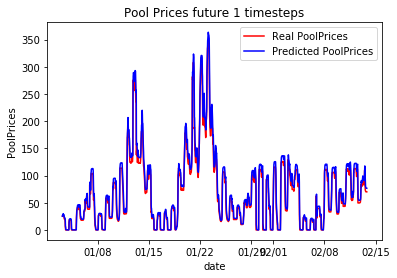

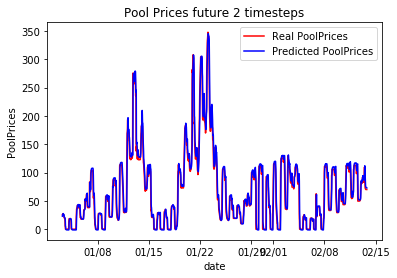

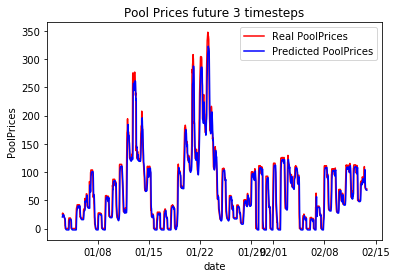

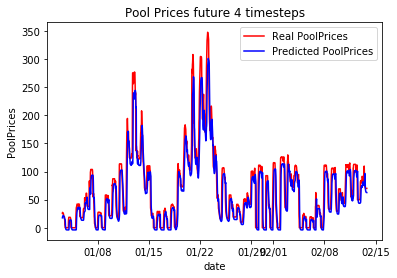

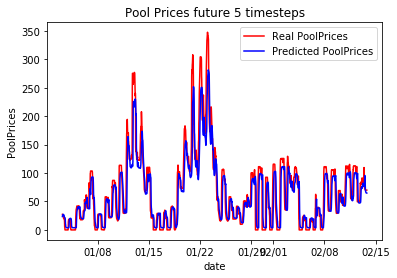

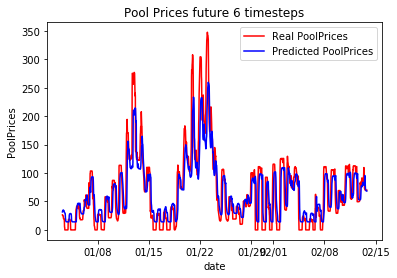

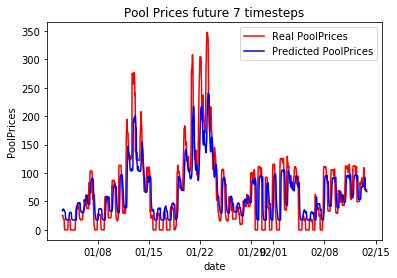

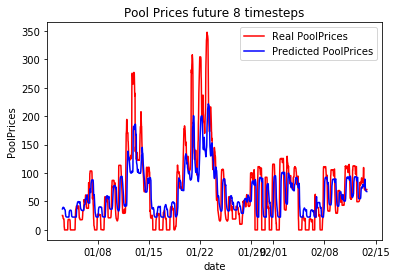

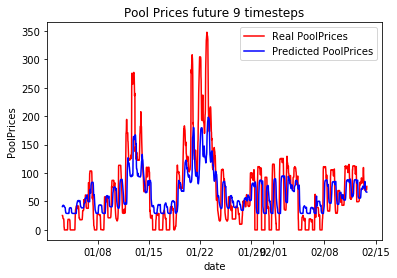

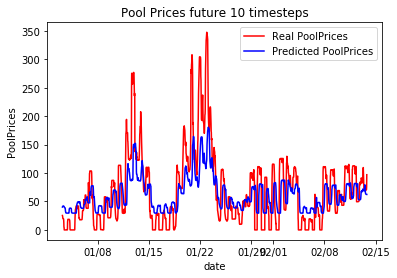

In [24]:
# Visualizing the results
num=2000;
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
for i in range(10):
    fig = plt.figure()
    plt.plot(test_time[:num],price_test_real[:num,i], color = 'red', label = 'Real PoolPrices')
    plt.plot(test_time[:num],price_test_pred[:num,i], color = 'blue', label = 'Predicted PoolPrices')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    tt='Pool Prices future '+str(i+1)+' timesteps'
    plt.title(tt)
    plt.xlabel('date')
    plt.ylabel('PoolPrices')
    plt.legend()
    plt.show()
    fig.savefig(tt+'.png')

In [526]:
x_train

array([0.02412709, 0.02398548, 0.02397002, ..., 0.0105627 , 0.01068873,
       0.01101918])

In [582]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Generate dummy data
import numpy as np
x_train = train_set[:,:80]
y_train = keras.utils.to_categorical(y_train_react, num_classes=3)
x_test = test_set[:,:80]
y_test = keras.utils.to_categorical(y_test_react, num_classes=3)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle= True)
keras.layers.normalization.BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None)
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=4*p))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['categorical_accuracy'])

history=model.fit(x_train, y_train, epochs=25, batch_size=64,validation_data=(x_val, y_val),verbose=1)
score = model.evaluate(x_test, y_test, batch_size=64)

Train on 20752 samples, validate on 5188 samples
Epoch 1/25
20752/20752 [==============================] - 3s 141us/step - loss: 1.0336 - categorical_accuracy: 0.4973 - val_loss: 0.7795 - val_categorical_accuracy: 0.7579
Epoch 2/25
20752/20752 [==============================] - 1s 33us/step - loss: 0.6497 - categorical_accuracy: 0.7696 - val_loss: 0.5503 - val_categorical_accuracy: 0.8138
Epoch 3/25
20752/20752 [==============================] - 1s 34us/step - loss: 0.4799 - categorical_accuracy: 0.8521 - val_loss: 0.4227 - val_categorical_accuracy: 0.8716
Epoch 4/25
20752/20752 [==============================] - 1s 33us/step - loss: 0.3723 - categorical_accuracy: 0.8975 - val_loss: 0.3317 - val_categorical_accuracy: 0.9042
Epoch 5/25
20752/20752 [==============================] - 1s 34us/step - loss: 0.2933 - categorical_accuracy: 0.9257 - val_loss: 0.2630 - val_categorical_accuracy: 0.9333
Epoch 6/25
20752/20752 [==============================] - 1s 33us/step - loss: 0.2327 - categor

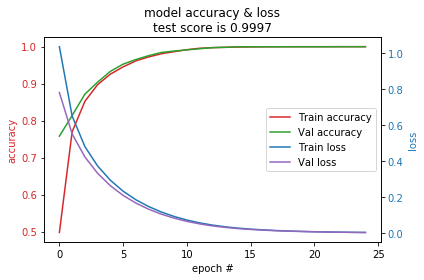

In [583]:
fig, ax1 = plt.subplots()
plt.title('model accuracy & loss\ntest score is '+str(round(score[1],4)))
color = 'tab:red'
ax1.set_xlabel('epoch #')
ax1.set_ylabel('accuracy', color=color)
lns1=ax1.plot(history.history['categorical_accuracy'], color='tab:red',label='Train accuracy')
lns2=ax1.plot(history.history['val_categorical_accuracy'], color='tab:green',label='Val accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('loss', color=color)  # we already handled the x-label with ax1
lns3=ax2.plot( history.history['loss'], color='tab:blue',label='Train loss')
ax2.tick_params(axis='y', labelcolor=color)
lns4=ax2.plot( history.history['val_loss'], color='tab:purple',label='Val loss')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc=5)
plt.show()

In [532]:
score

[0.0002698147537905226, 1.0]